In [186]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Circle
import numpy as np

In [187]:
df = pd.read_csv('out.csv')
df

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,Unnamed: 10
0,9.999998,0.000000e+00,3.090169,9.510563,-8.090168,5.877851,-8.090168,-5.877851,3.090169,-9.510563,NaN
1,9.999995,0.000000e+00,3.090168,9.510560,-8.090166,5.877849,-8.090166,-5.877849,3.090168,-9.510560,NaN
2,9.999989,0.000000e+00,3.090167,9.510555,-8.090161,5.877846,-8.090161,-5.877846,3.090167,-9.510555,NaN
3,9.999982,0.000000e+00,3.090164,9.510548,-8.090155,5.877842,-8.090155,-5.877842,3.090164,-9.510548,NaN
4,9.999973,-2.189529e-53,3.090162,9.510540,-8.090148,5.877837,-8.090148,-5.877837,3.090162,-9.510540,NaN
...,...,...,...,...,...,...,...,...,...,...,...
32229,-10.384110,-1.072672e+00,-1.930185,-10.186165,9.586715,-4.653254,7.655901,6.137695,-4.928320,9.774395,NaN
32230,-10.389721,-1.071835e+00,-1.932815,-10.191365,9.590576,-4.657701,7.660817,6.140795,-4.928857,9.780106,NaN
32231,-10.395332,-1.070996e+00,-1.935447,-10.196565,9.594435,-4.662150,7.665734,6.143895,-4.929391,9.785816,NaN
32232,-10.400942,-1.070156e+00,-1.938080,-10.201763,9.598293,-4.666600,7.670651,6.146994,-4.929922,9.791526,NaN


In [188]:
vel = pd.read_csv('vel.csv')
vel

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,Unnamed: 10
0,-0.001789,0.000000e+00,-0.000553,-0.001701,0.001447,-0.001051,0.001447,0.001051,-0.000553,0.001701,NaN
1,-0.003578,0.000000e+00,-0.001106,-0.003403,0.002894,-0.002103,0.002894,0.002103,-0.001106,0.003403,NaN
2,-0.005367,0.000000e+00,-0.001658,-0.005104,0.004342,-0.003154,0.004342,0.003154,-0.001658,0.005104,NaN
3,-0.007155,0.000000e+00,-0.002211,-0.006805,0.005789,-0.004206,0.005789,0.004206,-0.002211,0.006805,NaN
4,-0.008944,-2.189529e-50,-0.002764,-0.008507,0.007236,-0.005257,0.007236,0.005257,-0.002764,0.008507,NaN
...,...,...,...,...,...,...,...,...,...,...,...
32229,-5.611542,8.359712e-01,-2.628872,-5.201211,3.863078,-4.445778,4.915788,3.100221,-0.538451,5.710797,NaN
32230,-5.611069,8.372925e-01,-2.630301,-5.200379,3.861234,-4.447286,4.916323,3.099901,-0.536187,5.710472,NaN
32231,-5.610589,8.386125e-01,-2.631726,-5.199541,3.859386,-4.448789,4.916851,3.099577,-0.533923,5.710140,NaN
32232,-5.610102,8.399309e-01,-2.633148,-5.198696,3.857535,-4.450285,4.917374,3.099250,-0.531658,5.709801,NaN


In [189]:
acc = pd.read_csv('acc.csv')
acc

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,Unnamed: 10
0,-1.788854,-0.000000e+00,-0.552786,-1.701302,1.447214,-1.051462,1.447214,1.051462,-0.552786,1.701302,NaN
1,-1.788854,-0.000000e+00,-0.552786,-1.701302,1.447214,-1.051462,1.447214,1.051462,-0.552786,1.701302,NaN
2,-1.788854,-0.000000e+00,-0.552786,-1.701302,1.447214,-1.051462,1.447214,1.051462,-0.552786,1.701302,NaN
3,-1.788854,-0.000000e+00,-0.552786,-1.701302,1.447214,-1.051462,1.447214,1.051462,-0.552786,1.701302,NaN
4,-1.788854,-2.189529e-47,-0.552786,-1.701302,1.447214,-1.051462,1.447214,1.051462,-0.552786,1.701302,NaN
...,...,...,...,...,...,...,...,...,...,...,...
32229,0.466393,1.322796e+00,-1.432594,0.826077,-1.839309,-1.514451,0.541171,-0.316363,2.264338,-0.318059,NaN
32230,0.473167,1.321372e+00,-1.428928,0.832238,-1.843519,-1.508523,0.534955,-0.320087,2.264326,-0.324999,NaN
32231,0.479928,1.319927e+00,-1.425242,0.838382,-1.847698,-1.502574,0.528733,-0.323805,2.264279,-0.331930,NaN
32232,0.486678,1.318463e+00,-1.421536,0.844508,-1.851845,-1.496606,0.522507,-0.327515,2.264195,-0.338851,NaN


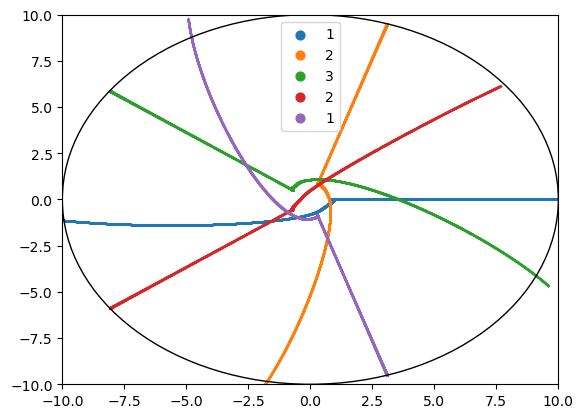

In [190]:
fig,axes = plt.subplots()
axes.set_xlim([-10,10])
axes.set_ylim([-10,10])
for i in range(5):
    c = [1,2,3,2,1][i]
    plt.scatter(df[str(i)+'x'],df[str(i)+'y'],s=0.1)
plt.legend([1,2,3,2,1], markerscale=20)
axes.add_patch(plt.Circle((0,0),10, fill=False))
plt.show()

In [191]:
def data(k):
    global df, vel
    out = []
    vel_ = []
    acc_ = []
    for i in range(5):
        out.append((df[str(i)+'x'].iloc[:k],df[str(i)+'y'].iloc[:k]))
        vel_.append((vel[str(i)+'x'].iloc[:k],vel[str(i)+'y'].iloc[:k]))
        acc_.append((acc[str(i)+'x'].iloc[:k],acc[str(i)+'y'].iloc[:k]))
    out = np.array(out)
    vel_ = np.array(vel_)
    acc_ = np.array(acc_)
    return out, vel_, acc_

In [192]:
pos, vel_, acc_ = data(3)
vel_

array([[[-0.00178885, -0.00357771, -0.00536656],
        [ 0.        ,  0.        ,  0.        ]],

       [[-0.00055279, -0.00110557, -0.00165836],
        [-0.0017013 , -0.0034026 , -0.0051039 ]],

       [[ 0.00144721,  0.00289443,  0.00434164],
        [-0.00105146, -0.00210292, -0.00315439]],

       [[ 0.00144721,  0.00289443,  0.00434164],
        [ 0.00105146,  0.00210292,  0.00315439]],

       [[-0.00055279, -0.00110557, -0.00165836],
        [ 0.0017013 ,  0.0034026 ,  0.0051039 ]]])

In [193]:
pos[2][0][2]

-8.0901612604679

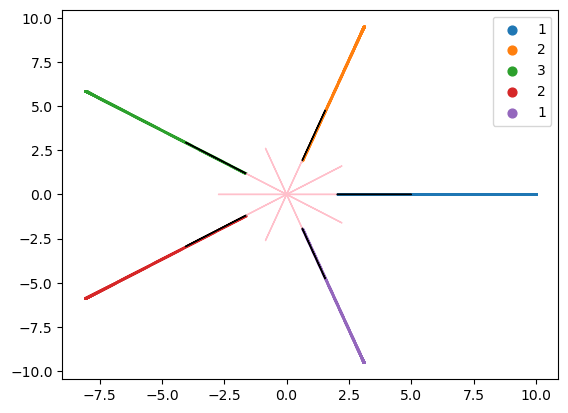

In [194]:
def vis(k):
    pos, v, a = data(k)
    for i in range(5):
        plt.scatter(pos[i][0], pos[i][1], s=0.1)
        plt.arrow(pos[i][0][-1], pos[i][1][-1], v[i][0][-1], v[i][1][-1], color='pink')
        plt.arrow(pos[i][0][-1], pos[i][1][-1], a[i][0][-1], a[i][1][-1], color='black')
    plt.legend([1,2,3,2,1, 'vel', 'acc'], markerscale=20)
    plt.show()
vis(3000)

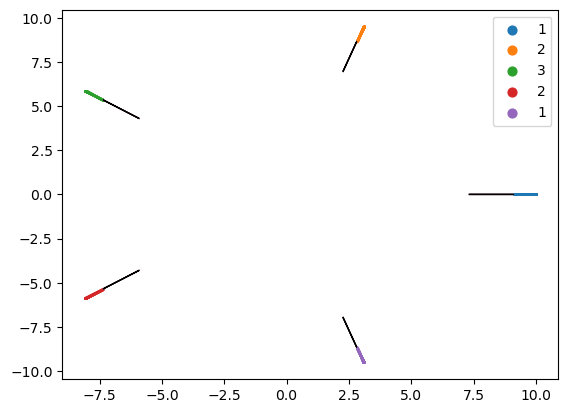

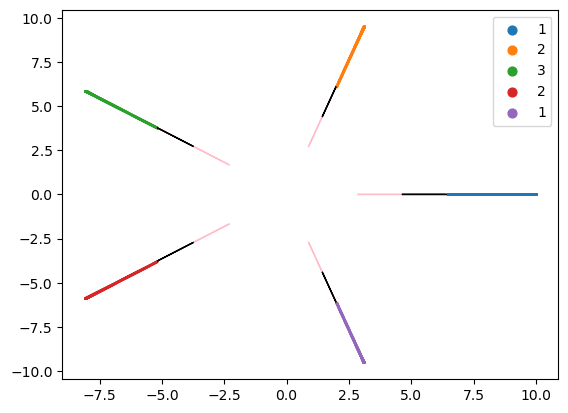

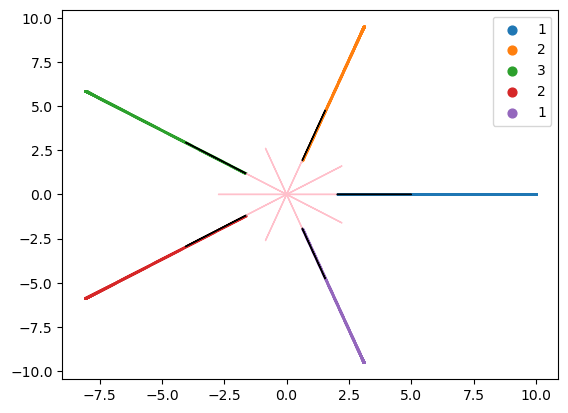

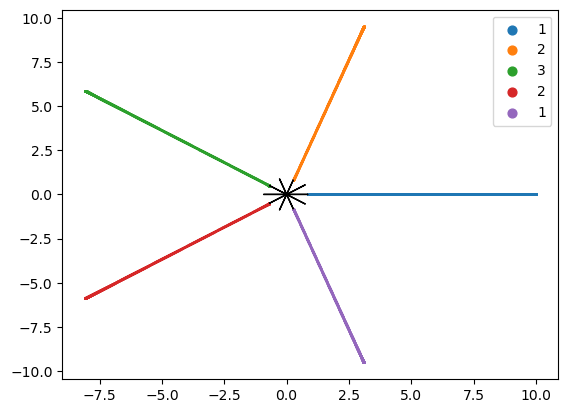

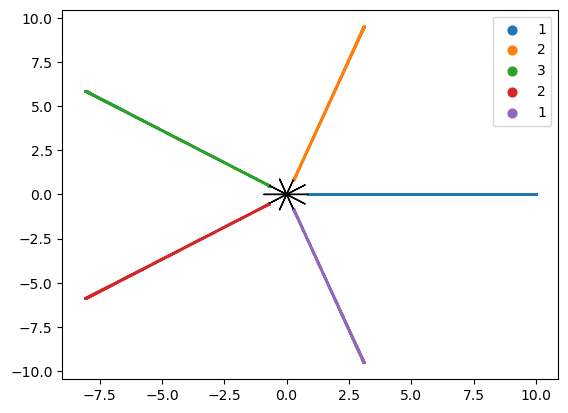

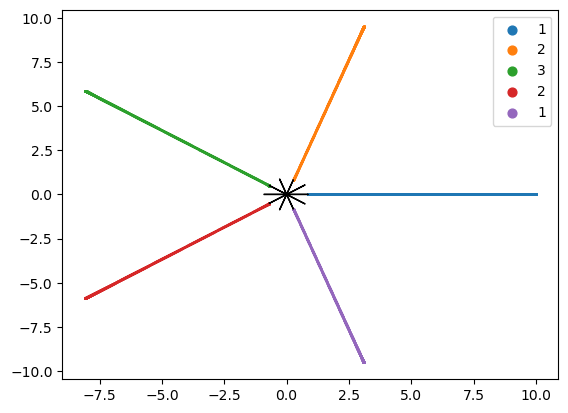

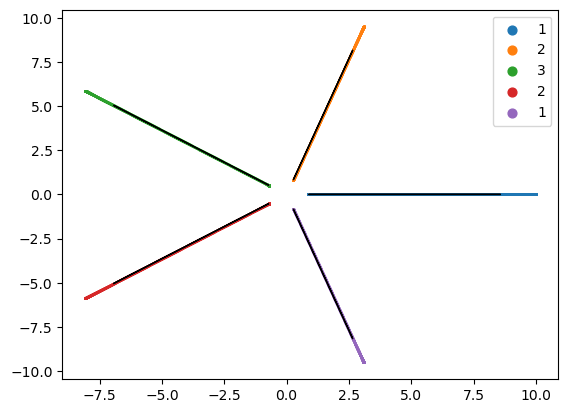

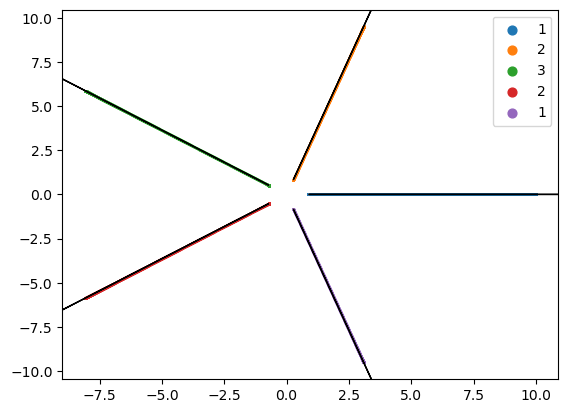

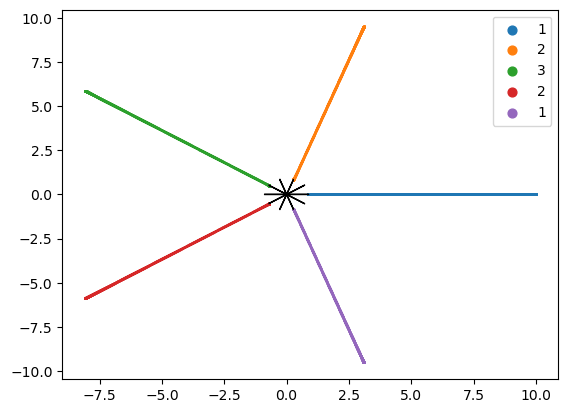

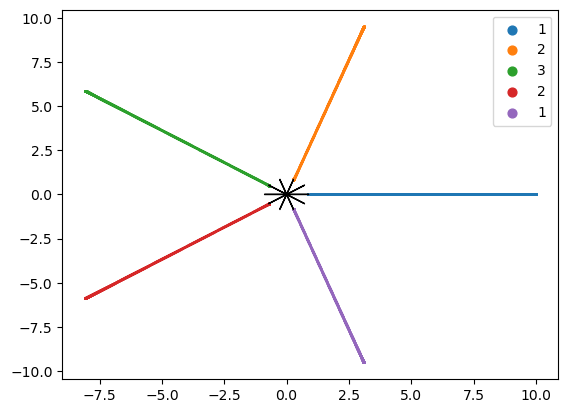

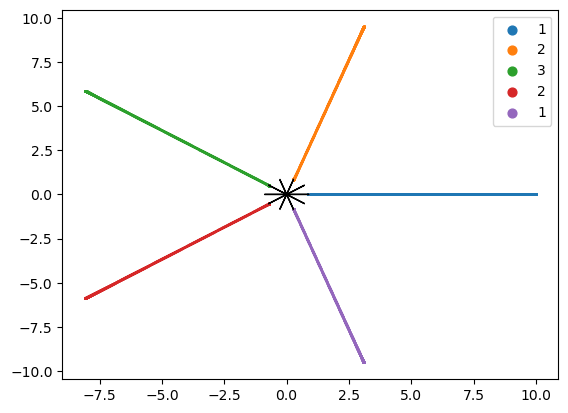

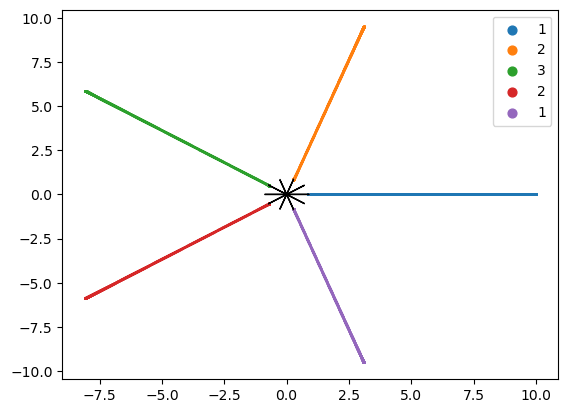

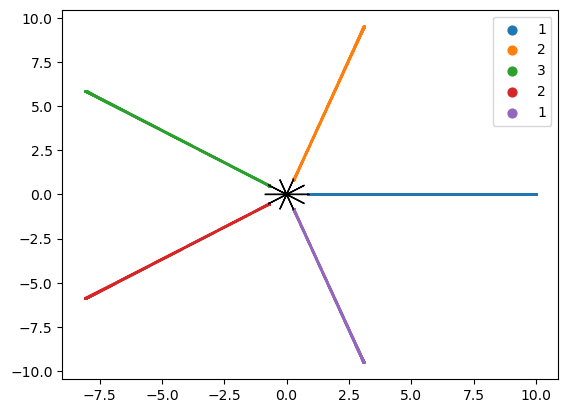

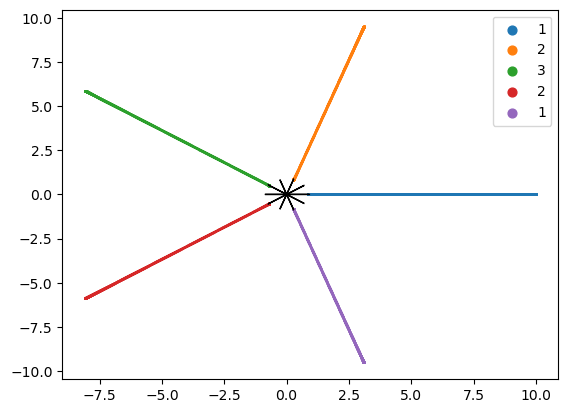

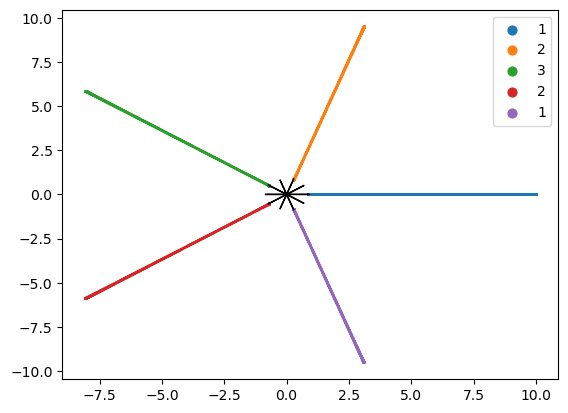

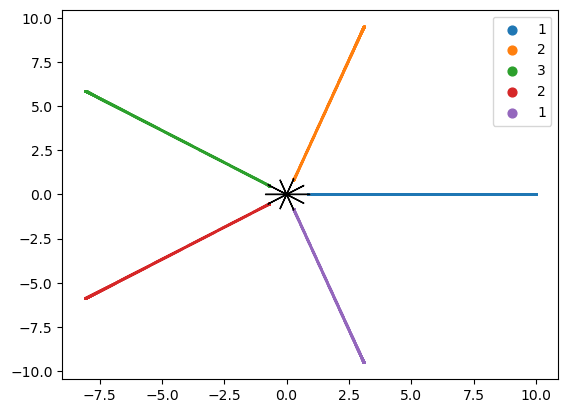

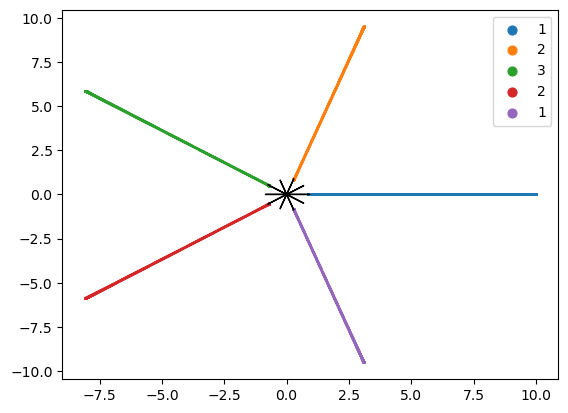

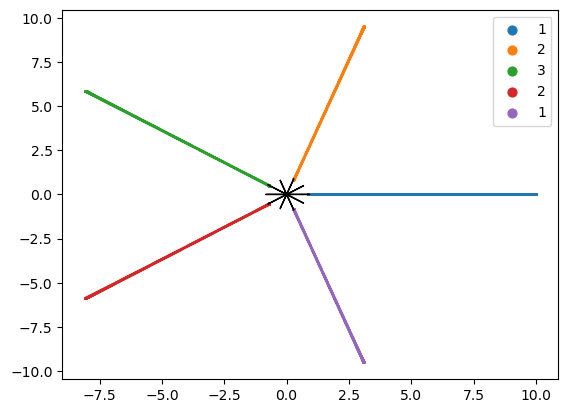

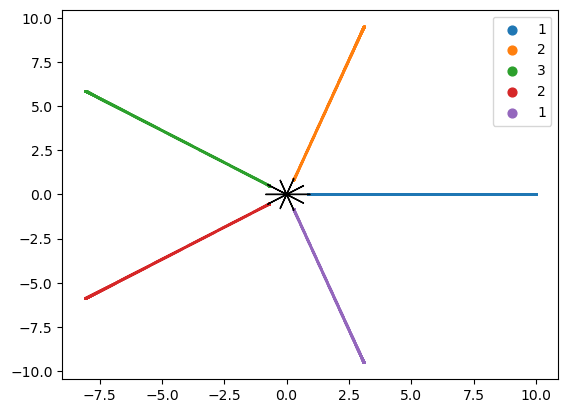

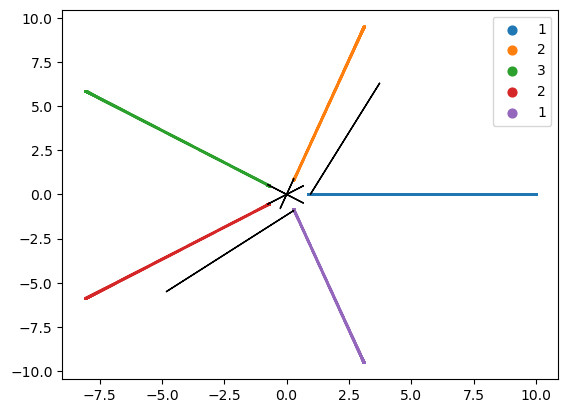

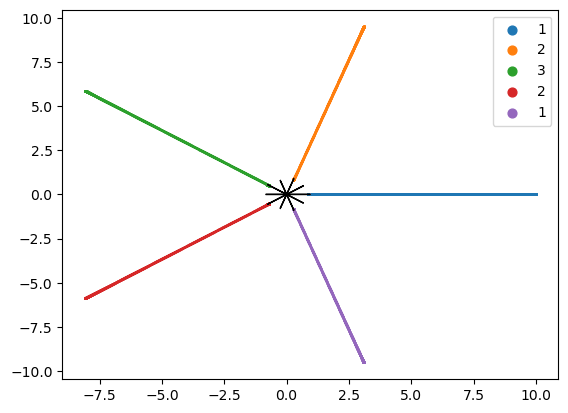

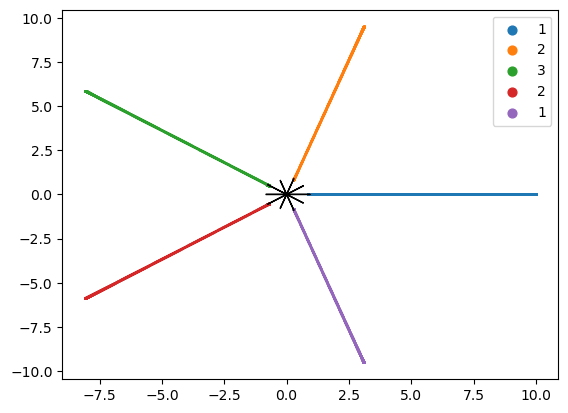

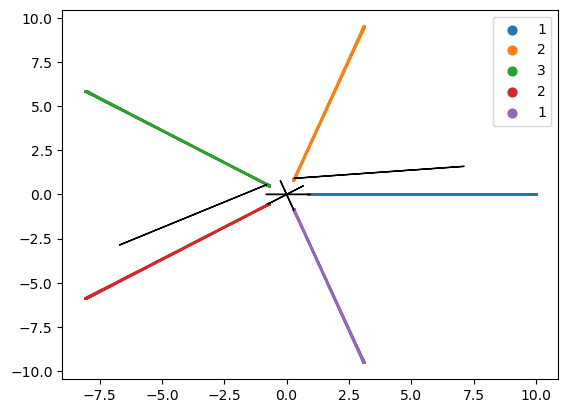

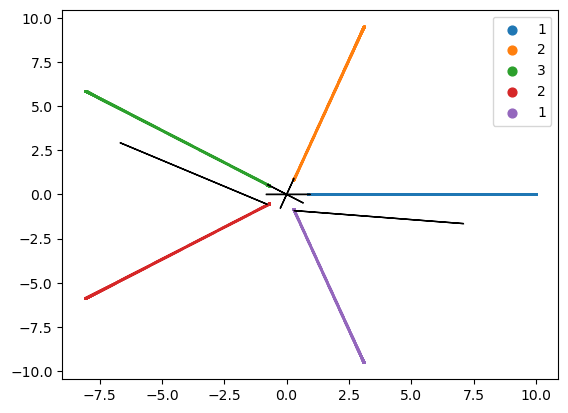

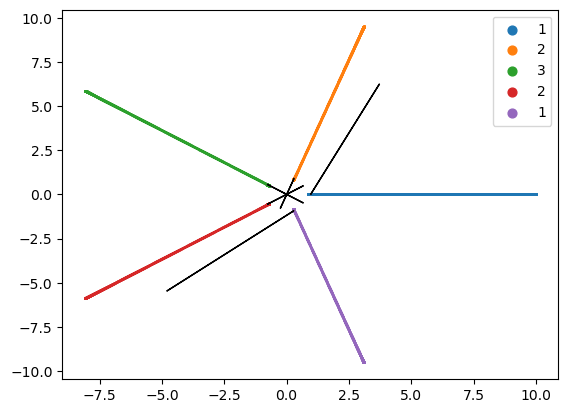

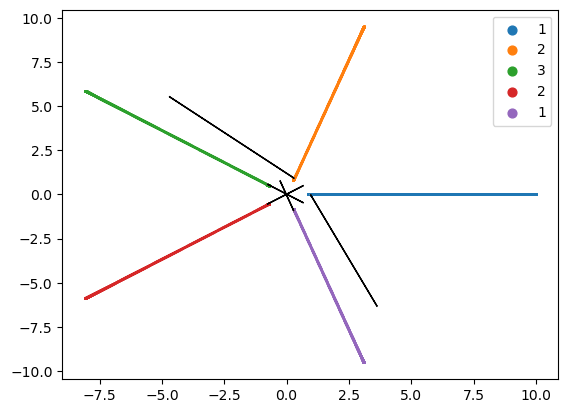

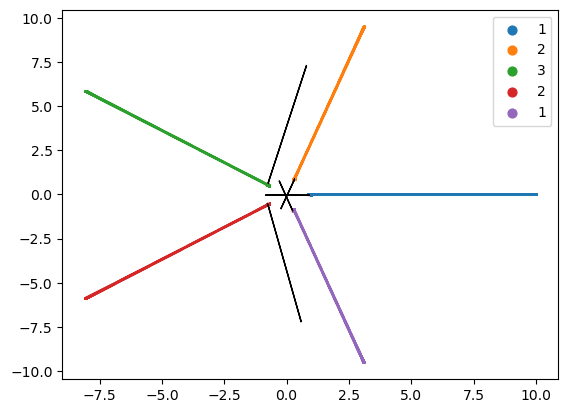

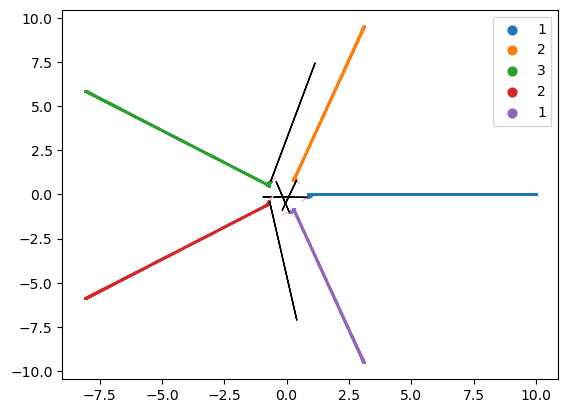

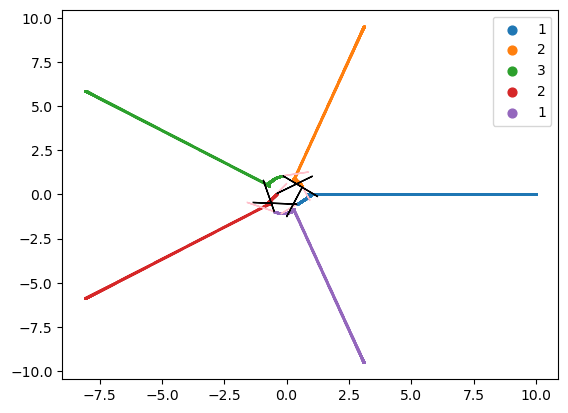

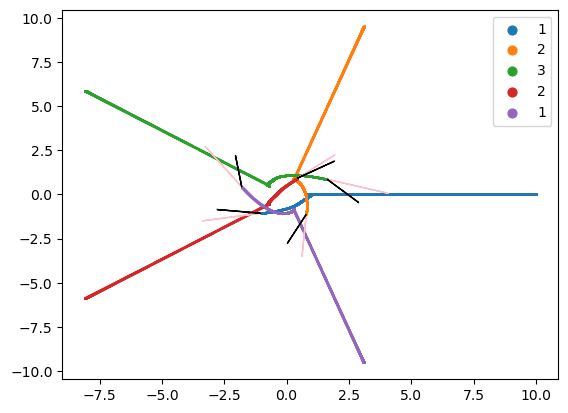

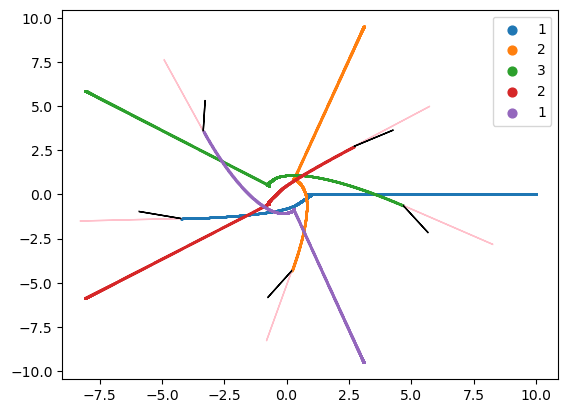

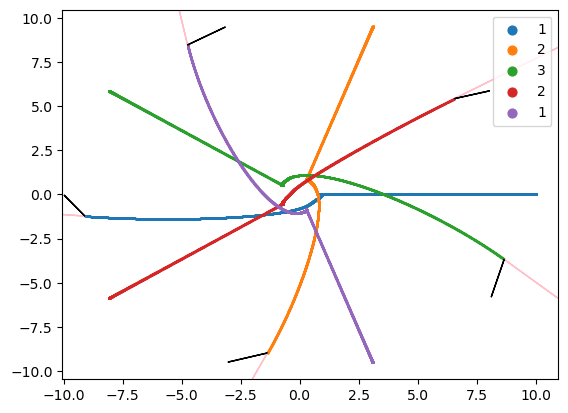

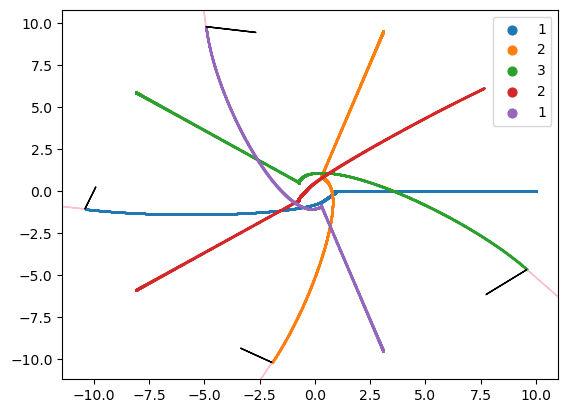

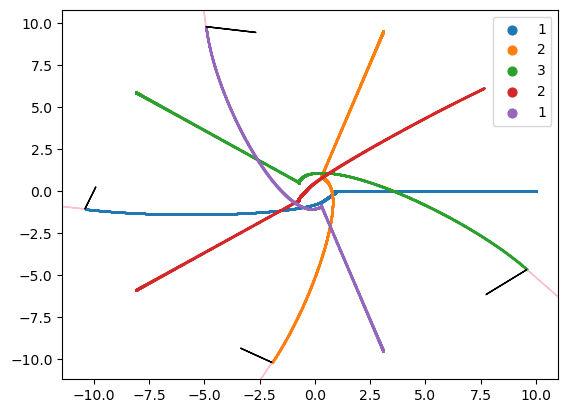

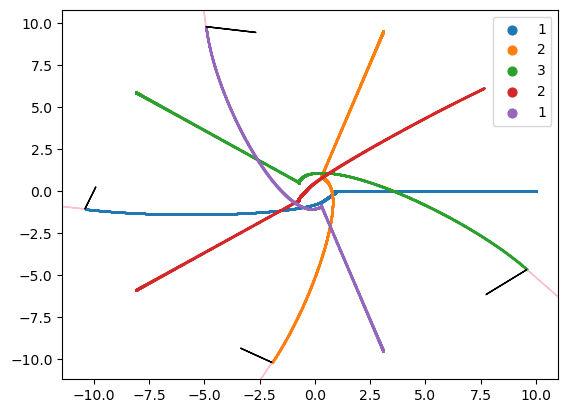

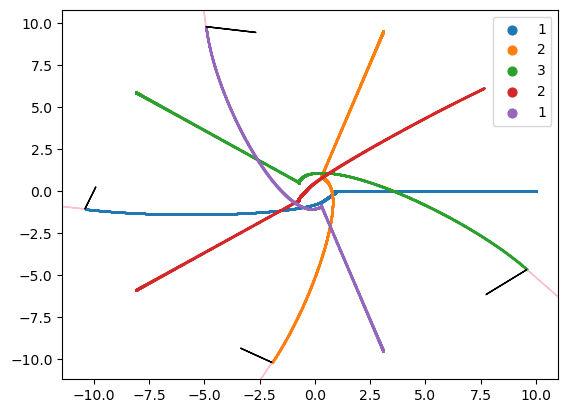

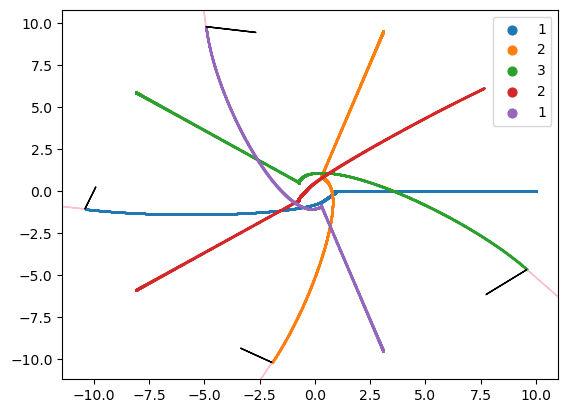

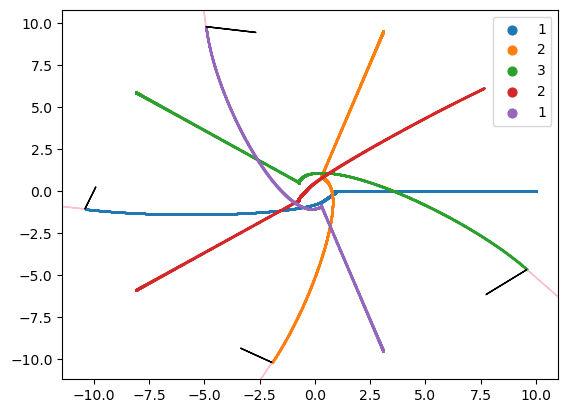

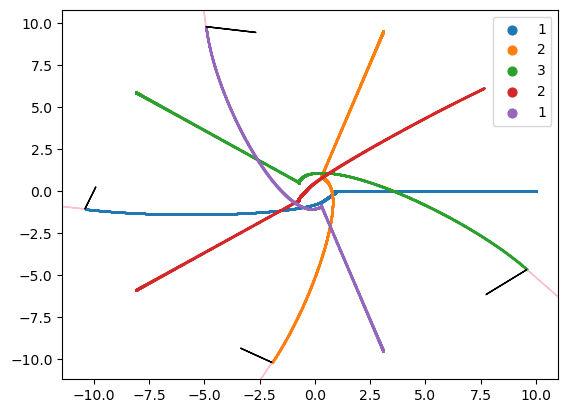

In [195]:
for k in range(1,40):
    vis(k*1000)